In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
#%matplotlib qt   # doesn't work on my laptop
from tistools import read_inputfile, get_LMR_interfaces, read_pathensemble, get_weights
from tistools import set_tau_distrib, set_tau_first_hit_M_distrib, cross_dist_distr, pathlength_distr
from tistools import collect_tau, collect_tau1, collect_tau2, collect_taum
from tistools import ACCFLAGS, REJFLAGS

from tistools import get_lmr_masks, get_generation_mask, get_flag_mask, select_with_masks
from tistools import unwrap_by_weight, running_avg_local_probs, get_local_probs, get_global_probs_from_local, get_global_probs_from_dict

from pprint import pprint    # to print the vars of the pathensemble object

from istar_test import *

/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/APPTIS/tistools/lib/istar_analysis.py:1314: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("Position x (=$\lambda$)")
/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/APPTIS/tistools/test/istar_test.py:1455: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("Position x (=$\lambda$)")


In [3]:
%autoreload 2  
 # something with pip install -e .

# Reading

In [8]:
# zero_minus_one = True if lambda_-1 interface is set
# zero_minus_one = False if lambda_-1 interface is not set

# data the maze
#---------------
#inputfile = indir + "/retis.rst"

# new data Elias
#---------------
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/flat_w-walls/brownian-gamma5/30k-cycles/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/flat_w-walls/newtonian/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/flat_w-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump1-walls/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump2-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump3-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump3-walls/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdip2-walls/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdip2-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/brownian/corr/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/langevin_gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/brownian/fine_intf/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/langevin_gamma5/fine_intf/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/brownian/intf_shift/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/langevin_gamma5/intf_shift/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdipmeta-walls/brownian/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdipmeta-walls/langevin_gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/2D-experiments/2D-maze/Wouter-2022/repptis3"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell2_0209"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_retiswell2_2108"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/i_star/simulations/RETIS_flat_br_noswap"
# indir = "/mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS"
# indir = "/run/user/1001/gvfs/smb-share:server=files.ugent.be,share=eliawils,user=eliawils/shares/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/flat_w-walls/langevin-gamma5/REPPTIS"
indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS"

zero_minus_one = False
inputfile = indir + "/repptis.rst"

import os
import glob
os.chdir(indir)
print(os.getcwd())


folders = glob.glob(indir + "/0[0-9][0-9]")
folders = sorted(folders)
print(folders)

/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS
['/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/001', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/002', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/003', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/004']


In [9]:
# !!! last lines !!!  allow to speed up this notebook
# pe.set_orders(load=False...)  -> 1st time you run the code, this will store npy files
# pe.set_orders(load=True...)  -> next time you run the code, you can read npy files

# Reading all input
#===================
interfaces, zero_left, timestep = read_inputfile(inputfile)
LMR_interfaces, LMR_strings = get_LMR_interfaces(interfaces, zero_left)
pathensembles = []
for i,fol in enumerate(folders):
    print("#"*80)
    print(fol)
    pe = read_pathensemble(fol+"/pathensemble.txt")
    pe.set_name(fol)
    pe.set_interfaces([LMR_interfaces[i], LMR_strings[i]])
    if i==0:
        pe.set_zero_minus_one(zero_minus_one)   # TODO this is never used
        pe.set_in_zero_minus(True)
    if i==1:
        pe.set_in_zero_plus(True)
    w, _ = get_weights(pe.flags, ACCFLAGS, REJFLAGS, verbose = False)
    pe.set_weights(w)
    print("pathensemble info: ")
    pprint(vars(pe))
    pathensembles.append(pe)
    # read order parameters order.txt/order.npy into path ensemble object
    #pe.set_orders(load=False, acc_only=True, save=False) # if saving doesn't work
    #### CHANGE HERE ####
    # pe.set_orders(load=False, acc_only=True, save=True) # for the 1st time
    # pe.set_orders(load=True, acc_only=True) # for the next times, save=True/False is not important

################################################################################
/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000


pathensemble info: 
{'cyclenumbers': array([    0,     1,     2, ..., 29998, 29999, 30000]),
 'dirs': array([   0., 2636., 1814., ..., 1810.,  915.,  958.]),
 'flags': array(['ACC', 'ACC', 'ACC', ..., 'ACC', 'ACC', 'ACC'], dtype='<U3'),
 'generation': array(['ki', 'sh', 'sh', ..., 'sh', 'sh', 'sh'], dtype='<U2'),
 'has_zero_minus_one': False,
 'in_zero_minus': True,
 'in_zero_plus': False,
 'interfaces': [[-0.1, -0.1, -0.1], ['l_[0]', 'l_[0]', 'l_[0]']],
 'istar_idx': array([[    0,     0],
       [    0, 68269],
       [    0,   836],
       ...,
       [    0,  2189],
       [    0,  1114],
       [    0,  1397]]),
 'lambmaxs': array([-0.09999883, -0.09990865, -0.09987787, ..., -0.09947621,
       -0.09966334, -0.09976969]),
 'lambmins': array([-0.20118421, -0.27415918, -0.35706824, ..., -0.46335523,
       -0.45559745, -0.37658975]),
 'lengths': array([86018,  2921,  2209, ...,  1953,  1964,  2139]),
 'lmrs': array(['RMR', 'RMR', 'RMR', ..., 'RMR', 'RMR', 'RMR'], dtype='<U3'),
 'nam

In [ ]:
# pathtype_cycles
print(indir[-20:])
pathtypes = ("LML", "LMR", "RMR", "RML", "LM*", "*M*", "***", "RM*", "L**", "**R", "R**")
pathtype_cycles = {}
pathtype_w = {}
for i, pe in enumerate(pathensembles):
    print(f"PE {i}")
    for ptype in pathtypes:
        pathtype_cycles[ptype] = np.sum((pathensembles[i].lmrs == ptype).astype(int))
        pathtype_w[ptype] = np.sum(unwrap_by_weight((pathensembles[i].lmrs == ptype).astype(int), pathensembles[i].weights))
    print(pathtype_cycles)
    print(pathtype_w)

    pathcodes = ("NCR", "FTL", "BTL", "BWI", "ACC")
    pathcode_cycles = {}
    pathcode_w = {}
    for code in pathcodes:
        pathcode_cycles[code] = np.sum((pathensembles[i].flags == code).astype(int))
        pathcode_w[code] = np.sum(unwrap_by_weight((pathensembles[i].flags == code).astype(int), pathensembles[i].weights))
    print("code", pathcode_cycles)
    print("code w", pathcode_w)
    print()

for i in range(len(pathensembles)):
    accmask = get_flag_mask(pathensembles[i], "ACC")
    loadmask = get_generation_mask(pathensembles[i], "ld")
    mask = get_lmr_masks(pathensembles[i])
    print(i, np.average(select_with_masks(pathensembles[i].lengths, [~loadmask, accmask])))
    print("LMRlen", i, np.average(select_with_masks(pathensembles[i].lengths, [~loadmask, accmask])))

for i in range(len(pathensembles)):
    accmask = get_flag_mask(pathensembles[i], "ACC")
    loadmask = get_generation_mask(pathensembles[i], "sh")
    mask = get_lmr_masks(pathensembles[i])
    print(i, np.average(select_with_masks(pathensembles[i].lengths, [loadmask, accmask])))
    print("LMRlen", i, np.average(select_with_masks(pathensembles[i].lengths, [~loadmask, accmask])))

-experiments/REPPTIS
PE 0
{'LML': 0, 'LMR': 0, 'RMR': 25270, 'RML': 0, 'LM*': 0, '*M*': 0, '***': 1273, 'RM*': 3458, 'L**': 0, '**R': 0, 'R**': 0}
{'LML': 0, 'LMR': 0, 'RMR': 30002, 'RML': 0, 'LM*': 0, '*M*': 0, '***': 0, 'RM*': 0, 'L**': 0, '**R': 0, 'R**': 0}
code {'NCR': 0, 'FTL': 2696, 'BTL': 1274, 'BWI': 0, 'ACC': 25263}
code w {'NCR': 0, 'FTL': 0, 'BTL': 0, 'BWI': 0, 'ACC': 30002}

PE 1
{'LML': 0, 'LMR': 9364, 'RMR': 0, 'RML': 8574, 'LM*': 2480, '*M*': 769, '***': 6342, 'RM*': 0, 'L**': 0, '**R': 5, 'R**': 2464}
{'LML': 0, 'LMR': 14963, 'RMR': 0, 'RML': 15039, 'LM*': 0, '*M*': 0, '***': 0, 'RM*': 0, 'L**': 0, '**R': 0, 'R**': 0}
code {'NCR': 0, 'FTL': 4954, 'BTL': 6351, 'BWI': 0, 'ACC': 16774}
code w {'NCR': 0, 'FTL': 0, 'BTL': 0, 'BWI': 0, 'ACC': 30002}

PE 2
{'LML': 0, 'LMR': 8157, 'RMR': 0, 'RML': 8170, 'LM*': 2364, '*M*': 2837, '***': 3429, 'RM*': 2283, 'L**': 766, '**R': 1, 'R**': 777}
{'LML': 0, 'LMR': 15019, 'RMR': 0, 'RML': 14983, 'LM*': 0, '*M*': 0, '***': 0, 'RM*': 0, '

In [ ]:
# Average path lengths per ensemble for each path type
print(indir[-20:])
pathtypes = ("LML", "LMR", "RMR", "RML", "LM*", "*M*", "***", "RM*", "L**", "**R", "R**")

print("=" * 80)
print("AVERAGE PATH LENGTHS BY ENSEMBLE AND PATH TYPE")
print("=" * 80)

for i, pe in enumerate(pathensembles):
    print(f"\nEnsemble {i} ({pe.name}):")
    print("-" * 50)
    
    for ptype in pathtypes:
        mask = (pe.lmrs == ptype)
        if np.any(mask):
            lengths = pe.lengths[mask]
            avg_length = np.mean(lengths)
            count = np.sum(mask)
            print(f"  {ptype:4s}: {avg_length:8.2f} (n={count:4d})")
        else:
            print(f"  {ptype:4s}: {0:8.2f} (n={0:4d})")

-experiments/REPPTIS
AVERAGE PATH LENGTHS BY ENSEMBLE AND PATH TYPE

Ensemble 0 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000):
--------------------------------------------------
  LML :     0.00 (n=   0)
  LMR :     0.00 (n=   0)
  RMR :  2880.59 (n=25270)
  RML :     0.00 (n=   0)
  LM* :     0.00 (n=   0)
  *M* :     0.00 (n=   0)
  *** :  4591.09 (n=1273)
  RM* :  3090.40 (n=3458)
  L** :     0.00 (n=   0)
  **R :     0.00 (n=   0)
  R** :     0.00 (n=   0)

Ensemble 1 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/001):
--------------------------------------------------
  LML :     0.00 (n=   0)
  LMR :   771.21 (n=9364)
  RMR :     0.00 (n=   0)
  RML :   791.27 (n=8574)
  LM* :   885.68 (n=2480)
  *M* :  2909.89 (n= 769)
  *** :   884.82 (n=6342)
  RM* :     0.00 (n=   0)
  L** :     0.00 (n=   0)
  **R :   774.60 (n=   5)
  R** :   953.30 (n=2464)

Ensemble 2 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/

In [8]:
# pathtype_cycles
print(indir[-20:])
pathtypes = ("LML", "LMR", "RMR", "RML", "LM*", "*M*", "***", "RM*", "L**", "**R", "R**")

sum_md = 0
for i in range(len(pathensembles)):
    accmask = get_flag_mask(pathensembles[i], "ACC")
    shmask = get_generation_mask(pathensembles[i], "sh")
    mask = get_lmr_masks(pathensembles[i])
    sum_md += np.sum(select_with_masks(pathensembles[i].lengths, [shmask]))
print("sum_md", sum_md)

/sim_retiswell2_2108
sum_md 70144031


In [6]:
for i in range(len(pathensembles)):
    accmask = get_flag_mask(pathensembles[i], "ACC")
    loadmask = get_generation_mask(pathensembles[i], "ld")
    mask = get_lmr_masks(pathensembles[i])
    btlnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "BTL"]
    btllens = pathensembles[i].lengths[pathensembles[i].flags == "BTL"]
    ftlnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "FTL"]
    ftllens = pathensembles[i].lengths[pathensembles[i].flags == "FTL"]
    ncrnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "NCR"]
    ncrlens = pathensembles[i].lengths[pathensembles[i].flags == "NCR"]
    bwinrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "BWI"]
    bwilens = pathensembles[i].lengths[pathensembles[i].flags == "BWI"]
    illnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "ILL"]
    illlens = pathensembles[i].lengths[pathensembles[i].flags == "ILL"]

    unis = []

    for nr in btlnrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
        unis.append((pathensembles[i].lengths[accid-1]-2)/(pathensembles[i].lengths[nr]-1))
    for nr in ftlnrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
        unis.append((pathensembles[i].lengths[accid-1]-2)/(pathensembles[i].lengths[nr]-2))
    for nr in ncrnrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
    for nr in bwinrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
    
    
    print(f"ensemble {i}:")
    print(f"# FTL: {len(ftllens)}, # BTL: {len(btllens)}, # NCR: {len(ncrlens)}, # BWI: {len(bwilens)}, # ILL: {len(illlens)}, tot: {len(illlens)+len(ftllens)+len(btllens)+len(ncrlens)+len(bwilens)}")
    print(f"mean uniform nr: {np.average(unis)}, variance: {np.var(unis)}")

ensemble 0:
# FTL: 2696, # BTL: 1274, # NCR: 0, # BWI: 0, # ILL: 0, tot: 3970
mean uniform nr: 0.8099179117032288, variance: 0.17897297671600412


ensemble 1:
# FTL: 4954, # BTL: 6351, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11305
mean uniform nr: 0.7111631865615431, variance: 0.30345344329957274
ensemble 2:
# FTL: 5090, # BTL: 6272, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11362
mean uniform nr: 0.7188239699767731, variance: 0.28911990212547406
ensemble 3:
# FTL: 5205, # BTL: 6278, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11483
mean uniform nr: 0.7127396475366575, variance: 0.300720586592191
ensemble 4:
# FTL: 5070, # BTL: 6274, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11344
mean uniform nr: 0.6414261514341452, variance: 0.057818078757572645


In [9]:
if 'repptis' in fol:
    plot_rv_repptis(pathensembles, interfaces, 3)
else:
    plot_rv_star(pathensembles, interfaces, 3)

NameError: name 'plot_rv_star' is not defined

# Analysis

In [88]:
# Setting path ensemble properties
#==================================
for i,fol in enumerate(folders):
    print(i)
    print("Calculating path lengths.")
    set_tau_distrib(pathensembles[i])
    print("Done.")

    if True:
        print("Calculating first hitting lengths to middle interface")
        set_tau_first_hit_M_distrib(pathensembles[i])
        print("Done.")

0
Calculating path lengths.


Done.
Calculating first hitting lengths to middle interface
Done.
1
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
2
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
3
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
4
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
5
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
6
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.


In [89]:
# Analyze the pptis simulation.
# Analysis output is saved to the data dictionary.
data = {}
for i, pe in enumerate(pathensembles):
    print("doing pathensemble {}".format(i))
    if i == 0:
        data[i] = {}
        continue  # TODO: make [0-] analysis ???

    # masks - TODO not used further on?
    # TODO these functions are duplicate in repptis_analysis
    #masks = get_lmr_masks(pe)
    #loadmask = get_generation_mask(pe, "ld")
    #print("Amount of loads: {}".format(np.sum(loadmask)))
    ##hardloadmask = get_hard_load_mask(loadmask)
    #accmask = get_flag_mask(pe, "ACC")

    # pathtype_cycles
    pathtypes = ("LML", "LMR", "RML", "RMR")
    pathtype_cycles = {}
    for ptype in pathtypes:
        pathtype_cycles[ptype] = unwrap_by_weight(
                (pe.lmrs == ptype).astype(int), pe.weights)
    
    # running average analysis: ["running"]
    data[i] = {}
    data[i]["running"] = {}
    data[i]["running"]["plocal"] = {}
    # you'll still have to hardload select pe.weigths... TODO. # this is comment wouter?
    for (ptype, p_loc) in zip(pathtypes, 
                              running_avg_local_probs(pathtype_cycles, 
                                                      pe.weights, tr = False)):
        data[i]["running"]["plocal"][ptype] = p_loc

    # analysis using all data: ["full"]
    plocfull = get_local_probs(pe, tr=False)
    data[i]["full"] = {}
    for ptype in pathtypes:
        data[i]["full"][ptype] = plocfull[ptype]

    # data[i] have now ["full"] and ["running"]

doing pathensemble 0
doing pathensemble 1
Weights of the different paths:
wRMR = 0
wRML = 8932
wLMR = 8574
wLML = 12496
Local crossing probabilities:
pRMR = 0.0
pRML = 1.0
pLMR = 0.40692928334124345
pLML = 0.5930707166587565
Local crossing probabilities:
p2R = 0.2857809479368042
p2L = 0.7142190520631958
doing pathensemble 2
Weights of the different paths:
wRMR = 690
wRML = 14201
wLMR = 13851
wLML = 1259
Local crossing probabilities:
pRMR = 0.04633671345107783
pRML = 0.9536632865489222
pLMR = 0.9166776968894772
pLML = 0.08332230311052283
Local crossing probabilities:
p2R = 0.4846838438718709
p2L = 0.5153161561281291
doing pathensemble 3
Weights of the different paths:
wRMR = 2028
wRML = 10920
wLMR = 11261
wLML = 5785
Local crossing probabilities:
pRMR = 0.1566265060240964
pRML = 0.8433734939759037
pLMR = 0.6606241933591458
pLML = 0.33937580664085415
Local crossing probabilities:
p2R = 0.4430552777222111
p2L = 0.5569447222777889
doing pathensemble 4
Weights of the different paths:
wRMR =

Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True


KeyboardInterrupt: 

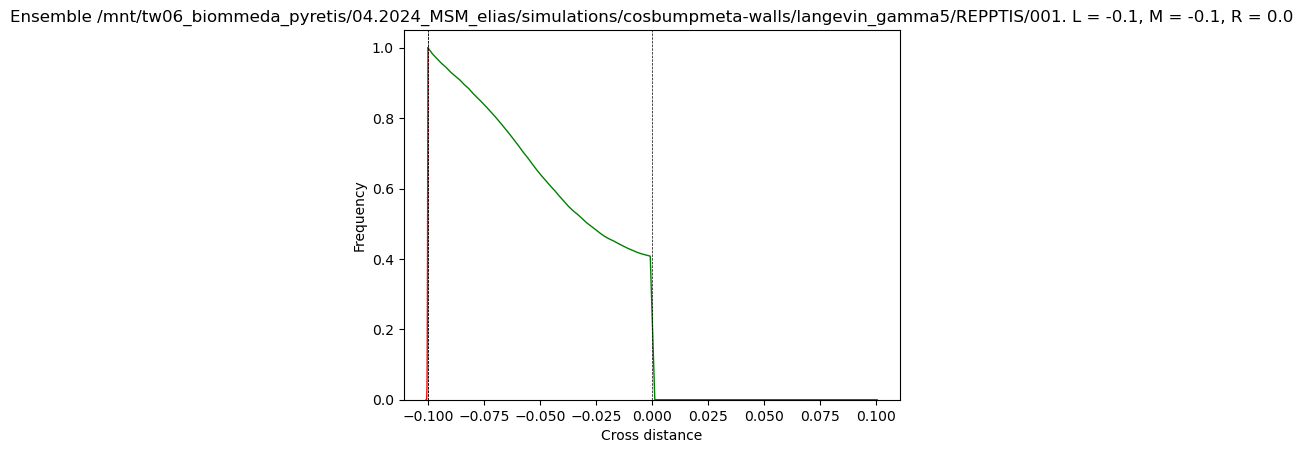

In [90]:

for i, pe in enumerate(pathensembles):
    upe = pe.unify_pe()
    # Pathlength distribution
    data[i]["pathlengths"] = pathlength_distr(upe)  # these might be used later or not! TODO
        
#=======================================
# make figures
makefigs = True 
if makefigs:
    for i, pe in enumerate(pathensembles):     
        if i == 0:
            continue
        # Cross distances distribution
        L, M, R, lmlpercs, lmllambs, rmrpercs, rmrlambs = cross_dist_distr(pe)
        fig,ax = plt.subplots()
        ax.plot(lmllambs, lmlpercs, lw=1, c="g")
        ax.plot(rmrlambs, rmrpercs, lw=1, c="r")
        for lamb in (L,M,R):
            ax.axvline(lamb, color='k', linestyle='--', lw = 0.5)
        ax.set_xlabel('Cross distance')
        ax.set_ylabel('Frequency')
        ax.set_title("Ensemble {}. L = {}, M = {}, R = {}".format(
            pe.name, L, M, R))
        ax.set_ylim(0)
        fig.savefig(f"pathensemble_{i}_crossdist.pdf")
        plt.close(fig)

        # Pathlength distribution      
        for ptype in pathtypes:
            fig, ax = plt.subplots()
            ax.plot(data[i]["pathlengths"][ptype]["bin_centers"], 
                data[i]["pathlengths"][ptype]["hist"])
            ax.set_xlabel('Pathlength')
            ax.set_ylabel('Frequency')
            ax.set_title(f"{np.sum(data[i]['pathlengths'][ptype]['hist'])} " + \
                         f"{ptype} paths. ")
            ax.legend([f"mean = {data[i]['pathlengths'][ptype]['mean']:.2f}, " + \
                          f"std = {data[i]['pathlengths'][ptype]['std']:.2f}"])
            fig.savefig(f"pathensemble_{i}_pathlength_{ptype}.pdf")
            plt.close(fig)

# Pcross with recursive relations

In [91]:
# Global crossing probabilities
# WITHOUT ERRORS #  
# Full data 
psfull = []
for i in range(1, len(pathensembles)):   # do not use the 0- ensemble
    psfull.append({"LMR": data[i]["full"]["LMR"], 
               "RML": data[i]["full"]["RML"], 
               "RMR": data[i]["full"]["RMR"],
               "LML": data[i]["full"]["LML"]})

Pminfull, Pplusfull, Pcrossfull = get_global_probs_from_dict(psfull)

/tmp/ipykernel_151698/76830505.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


KeyboardInterrupt: 

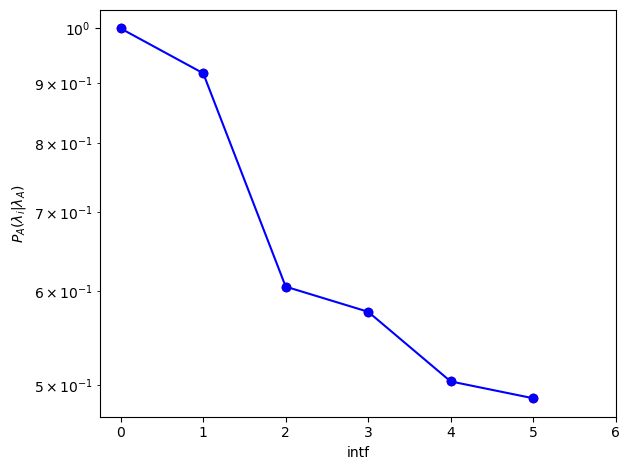

In [92]:
# Make a figure of the global crossing probabilities
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.plot(Pcrossfull, "o", c = "r")
ax.errorbar([i for i in range(len(Pcrossfull))], Pcrossfull, fmt="-o", c = "b", ecolor="r", capsize=6)


# cosdip meta
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.004830, Pcrossfull[2]*0.05068988646, Pcrossfull[3]*0.05189862680, Pcrossfull[4]*0.05071184896, Pcrossfull[5]*0.05083284286, Pcrossfull[6]*0.05067963543], fmt="-o", c = "b", ecolor="r", capsize=6)

# cosbump meta
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002535, Pcrossfull[2]*0.04393065503, Pcrossfull[3]*0.04910273500, Pcrossfull[4]*0.05239942040, Pcrossfull[5]*0.05789033634, Pcrossfull[6]*0.0614468], fmt="-o", c = "b", ecolor="r", capsize=6)

# cosbump meta true
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002629, Pcrossfull[2]*0.03973528878, Pcrossfull[3]*0.03900922030, Pcrossfull[4]*0.05239942040, Pcrossfull[5]*0.03734118282, Pcrossfull[6]*0.03899369101], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosdips
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.007239, Pcrossfull[2]*0.0414296, Pcrossfull[3]*0.0445266, Pcrossfull[4]*0.0483538], fmt="-o", c = "b", ecolor="r", capsize=6)

# 3 cosbumps
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002295, Pcrossfull[2]*0.0328798, Pcrossfull[3]*0.031594, Pcrossfull[4]*0.031474, Pcrossfull[5]*0.03080392, Pcrossfull[6]*0.0308589], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosbumps
#ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.002768, Pcrossfull[2]*0.04440278, Pcrossfull[3]*0.043053, Pcrossfull[4]*0.0463156], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosbumps Langevin
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.006395, Pcrossfull[2]*0.02092401277, Pcrossfull[3]*0.01899419954, Pcrossfull[4]*0.01929952226], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat dt=0.00002 30k cycles
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.003294, Pcrossfull[2]*0.07640968, Pcrossfull[3]*0.07789262, Pcrossfull[4]*0.0812692], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat 100k cycles
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.002741, Pcrossfull[2]*0.034092, Pcrossfull[3]*0.033621, Pcrossfull[4]*0.0398], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat Langevin
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.013684, Pcrossfull[2]*0.0825226801, Pcrossfull[3]*0.01027325454, Pcrossfull[4]*0.02130629112], fmt="-o", c = "b", ecolor="r", capsize=6)

ax.set_xlabel("intf")
ax.set_ylabel(r"$P_A(\lambda_i|\lambda_A)$")
ax.set_xticks(np.arange(len(interfaces)))
fig.tight_layout()
fig.show()
fig.savefig("Global_probs.pdf")

print("This should be the same as the repptis_report.pdf value:", Pcrossfull[-1])
print("which is the case!")
print(Pcrossfull)
print([Pcrossfull[i]/Pcrossfull[i-1] for i in range(1,len(Pcrossfull))])
print("Here, the load immediately disappeared. For a simulation where this is")
print("not the case, the above code should be adapted a little bit.")

In [51]:
# TODO I am not sure what this is

# Construct lists of the local probs

# Or we can use the get_global_probz function, using lists of the local probs
# These do not use the 0- ensemble
pmps = [data[i]["full"]["LMR"] for i in range(1,len(pathensembles))]
pmms = [data[i]["full"]["LML"] for i in range(1,len(pathensembles))]
ppps = [data[i]["full"]["RMR"] for i in range(1,len(pathensembles))]
ppms = [data[i]["full"]["RML"] for i in range(1,len(pathensembles))]
a,b,c = get_global_probs_from_local(pmps, pmms, ppps, ppms)
print("This should be the same as the repptis_report.pdf value:", c[-1])

This should be the same as the repptis_report.pdf value: 0.20279482107063834


# Now work with MSM

In [93]:
from tistools import construct_M
from tistools import global_pcross_msm
from tistools import mfpt_to_first_last_state, mfpt_to_absorbing_states

from tistools import create_labels_states

In [94]:
def print_vector(g, states=None):
    if states is None:
        for i in range(len(g)):
            print("state", i, g[i])
    else:
        for i in range(len(g)):
            print("state", states[i], g[i][0])

In [95]:
print(interfaces)
N = len(interfaces)
# assert N >= 4
NS = 4*N-5
print("N", N)
print("len pmms", len(pmms))
print("NS", NS)

#labels2 = ["0+- LML","0+- LMR","0+- RML","1+- LML","1+- LMR",
#           "1+- RML", "1+- RMR", "2+- LML", "2+- LMR",
#           "2+- RML", "2+- RMR", "3+- LML", "3+- LMR",]
labels1, labels2 = create_labels_states(N)

[-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
N 7
len pmms 6
NS 23


In [96]:
print("mm", pmms)
print("mp", pmps)
print("pm", ppms)
print("pp", ppps)
print("sum", np.array(pmms)+np.array(pmps))
print("sum", np.array(ppms)+np.array(ppps))
M = construct_M(pmms, pmps, ppms, ppps, N)

#Local crossing probabilities:
#pRMR = 0.34205627942625644.  #ppps
#pRML = 0.6579437205737436.   #ppms
#pLMR = 0.25316455696202533.  #pmps
#pLML = 0.7468354430379747.   #pmms

mm [0.5930707166587565, 0.08332230311052283, 0.33937580664085415, 0.05601701109708286, 0.15210084033613444, 0.05873048621140224]
mp [0.40692928334124345, 0.9166776968894772, 0.6606241933591458, 0.9439829889029171, 0.8478991596638655, 0.9412695137885978]
pm [1.0, 0.9536632865489222, 0.8433734939759037, 0.9491072025680466, 0.6401750340015374, 0.9151303447829743]
pp [0.0, 0.04633671345107783, 0.1566265060240964, 0.050892797431953456, 0.35982496599846253, 0.08486965521702568]
sum [1. 1. 1. 1. 1. 1.]
sum [1. 1. 1. 1. 1. 1.]


In [97]:
print("M")
print("shape", M.shape)
print("sum prob in rows", np.sum(M,axis=1))
print(M)
# row 8, 10, 12, 14. # counting starts from 0   not okay!!!!

M
shape (23, 23)
sum prob in rows [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.         0.59307072 0.40692928 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.0833223  0.9166777
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

# Look at this Markov model

In [98]:
#import numpy.linalg
vals, vecs = np.linalg.eig(M)
print(vals)
vals, vecs = np.linalg.eig(M.T)
print(vals)
pprint(M)

[-1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -6.05021991e-01+5.01323029e-01j -6.05021991e-01-5.01323029e-01j
  6.05021991e-01+5.01323029e-01j  6.05021991e-01-5.01323029e-01j
 -5.10023114e-17+6.82158226e-01j -5.10023114e-17-6.82158226e-01j
 -2.25473065e-01+3.31169491e-01j -2.25473065e-01-3.31169491e-01j
  2.25473065e-01+3.31169491e-01j  2.25473065e-01-3.31169491e-01j
  2.41386234e-16+4.57946060e-09j  2.41386234e-16-4.57946060e-09j
 -4.13512549e-17+0.00000000e+00j -4.87145651e-16+0.00000000e+00j
  5.52322923e-17+0.00000000e+00j  4.83992940e-17+0.00000000e+00j
 -1.62011573e-18+1.64488222e-18j -1.62011573e-18-1.64488222e-18j
  4.59281917e-33+0.00000000e+00j -4.99466385e-31+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j]
[ 1.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
  6.05021991e-01+5.01323029e-01j  6.05021991e-01-5.01323029e-01j
 -6.05021991e-01+5.01323029e-01j -6.05021991e-01-5.01323029e-01j
  2.84854790e-18+6.82158226e-01j  2.84854790e-18-6.82158

In [99]:
print("what if chain propagates")
print("A[0,:]")
# check stationary behavior
A = M
for n in range(10):
    A = np.dot(A,M)
    #print(A)
    print(A[0,:])
    print(np.sum(A[0,:]))  # is 1 indeed

what if chain propagates
A[0,:]
[0.59307072 0.         0.         0.         0.03390629 0.373023
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
1.0
[0.         0.35173287 0.24133784 0.03390629 0.         0.
 0.         0.         0.12659498 0.24642802 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
1.0
[0.38563916 0.         0.         0.         0.02010882 0.22122902
 0.12072899 0.005866   0.         0.         0.         0.
 0.01380416 0.23262386 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
1.0
[0.         0.22871129 0.15692787 0.14083781 0.         0.
 0.         0.         0.07707055 0.15002446 0.01164206 0.0021621
 0.         0.         0.         0.         0.03538228 0.19724157
 0.         0.         0.         0.         0. 

# Pcross with MSM

In [100]:
# global crossing prob
z1, z2, y1, y2 = global_pcross_msm(M)
print("Z")
print_vector(z1, labels1)
print_vector(z2, labels2)
print("Y")
print_vector(y1, labels1)
print_vector(y2, labels2)
print("global crossing prob", y1[0])
pcross = y1[0][0]

Z
state 0-      0
state B       1
state 0+- LML 0.0
state 0+- LMR 0.4983539631395322
state 0+- RML 0.0
state 1+- LML 0.0
state 1+- LMR 0.5436523271271627
state 1+- RML 0.0
state 1+- RMR 0.5436523271271627
state 2+- LML 0.02519106209910296
state 2+- LMR 0.8099962058401833
state 2+- RML 0.02519106209910296
state 2+- RMR 0.8099962058401833
state 3+- LML 0.14811234967300713
state 3+- LMR 0.849273137471109
state 3+- RML 0.14811234967300715
state 3+- RMR 0.849273137471109
state 4+- LML 0.18379638361364486
state 4+- LMR 0.9686500378162043
state 4+- RML 0.18379638361364486
state 4+- RMR 0.9686500378162043
state 5+- LML 0.46620632305084986
state 5+- LMR 1.0
Y
state 0-      0.2027948210706383
state B       0.0
state 0+- LML 0.0
state 0+- LMR 0.4983539631395322
state 0+- RML 0.0
state 1+- LML 0.0
state 1+- LMR 0.5436523271271627
state 1+- RML 0.0
state 1+- RMR 0.5436523271271627
state 2+- LML 0.025191062099102966
state 2+- LMR 0.8099962058401833
state 2+- RML 0.025191062099102966
state 2+- RMR 0.

# Collecting times

In [101]:
def print_all_tau(pathensembles, taumm, taump, taupm, taupp):
    # print all tau
    print(f"                  mm            mp            pm            pp")
    for i in range(len(pathensembles)):
        print(f"{i} {pathensembles[i].name}  {taumm[i]:13.1f} {taump[i]:13.1f} {taupm[i]:13.1f} {taupp[i]:13.1f}")

In [102]:
tau_mm, tau_mp, tau_pm, tau_pp = collect_tau(pathensembles)
tau1_mm, tau1_mp, tau1_pm, tau1_pp = collect_tau1(pathensembles)
tau2_mm, tau2_mp, tau2_pm, tau2_pp = collect_tau2(pathensembles)
taum_mm, taum_mp, taum_pm, taum_pp = collect_taum(pathensembles)

Collect tau
ensemble 0 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/000
ensemble 1 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/001
ensemble 2 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/002
ensemble 3 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/003
ensemble 4 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/004
ensemble 5 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/005
ensemble 6 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/006
Collect tau1
Collect tau2
Collect taum


In [103]:
print("tau")
print_all_tau(pathensembles, tau_mm, tau_mp, tau_pm, tau_pp)
print("\ntau1")
print_all_tau(pathensembles, tau1_mm, tau1_mp, tau1_pm, tau1_pp)
print("\ntaum")
print_all_tau(pathensembles, taum_mm, taum_mp, taum_pm, taum_pp)
print("\ntau2")
print_all_tau(pathensembles, tau2_mm, tau2_mp, tau2_pm, tau2_pp)

tau
                  mm            mp            pm            pp
0 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/000            nan           nan           nan        2848.1
1 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/001          825.7         452.4         459.0           nan
2 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/002         1899.8         954.1         943.1        1934.1
3 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/003         3183.7        1439.2        1480.5        3144.4
4 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/004         1676.2         920.5         915.7        1763.9
5 /mnt/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/cosbumpmeta-walls/langevin_gamma5/REPPTIS/005         3136.2    

In [104]:
def construct_tau_vector(N, NS, taumm, taump, taupm, taupp):
    assert N>=3
    assert NS==4*N-5
    assert len(taumm) == N
    assert len(taump) == N
    assert len(taupm) == N
    assert len(taupp) == N
    # unravel the values into one vector
    tau = np.zeros(NS)
    # [0-]
    tau[0] = taupp[0]
    # [0+-]
    tau[1] = taumm[1]
    tau[2] = taump[1]
    tau[3] = taupm[1]
    # [1+-] etc
    for i in range(1,N-2):
        tau[4*i]   = taumm[i+1]
        tau[4*i+1] = taump[i+1]
        tau[4*i+2] = taupm[i+1]
        tau[4*i+3] = taupp[i+1]
    # [(N-2)^(-1)]
    tau[-3] = taumm[-1]
    tau[-2] = taump[-1]
    # B
    tau[-1] = 0.   # whatever
    return tau

In [105]:
tau  = construct_tau_vector(N, NS, tau_mm, tau_mp, tau_pm, tau_pp)
tau1 = construct_tau_vector(N, NS, tau1_mm, tau1_mp, tau1_pm, tau1_pp)
taum = construct_tau_vector(N, NS, taum_mm, taum_mp, taum_pm, taum_pp)
tau2 = construct_tau_vector(N, NS, tau2_mm, tau2_mp, tau2_pm, tau2_pp)
tau_m = tau-tau1-tau2  # yes, this is the same thing as taum

print("tau")
print(tau)
print("\n")
print("tau1")
print(tau1)
print("taum")
print(taum)
print("tau_m")
print(tau_m)
print("tau2")
print(tau2)

print("\n")
print("tau = tau1+taum+tau2 => difference is", np.sum((tau-tau1-taum-tau2)**2))

tau
[2848.14391894  825.69230154  452.40891066  459.0088446  1899.84988086
  954.13536929  943.09076826 1934.10869565 3183.706828   1439.21072729
 1480.46996337 3144.36883629 1676.15065243  920.47986766  915.65431229
 1763.90670171 3136.15369161 1438.83953509 1405.89257343 3117.61906327
 1927.88173302  976.10820487    0.        ]


tau1
[  0.           0.           0.         459.00604568 624.68705322
 447.51064905 491.50418985 725.00869565 594.34831461 449.69523133
 436.43946886 565.62228797 625.35112693 451.22131494 460.43510428
 673.61366623 566.02310397 443.7438508  459.16829854 617.21133936
 697.17798595 499.34814057   0.        ]
taum
[2.84814392e+03 8.25692302e+02 5.71495218e-03 2.79892521e-03
 6.69147736e+02 1.17355426e+01 1.11509753e+01 4.74918841e+02
 1.98535367e+03 5.51101501e+02 5.87885897e+02 2.01113363e+03
 4.29638197e+02 7.76003097e+00 9.85646843e+00 4.33919842e+02
 1.99247564e+03 5.39356158e+02 5.05079346e+02 1.89730074e+03
 5.32950820e+02 1.62736173e+01 0.00000000e+00]

# Compute tau for [0+]

In [106]:
absor = np.array([NS - 1])
kept = np.array([i for i in range(NS) if i not in absor])

g1, g2, h1, h2 = mfpt_to_absorbing_states(M, np.nan_to_num(tau1), np.nan_to_num(tau_m), np.nan_to_num(tau2), absor, kept, remove="") #, doprint=True)
print("G")
print_vector(g1, labels1[-1])
print_vector(g2, [labels1[0]] + labels2)
print("H")
print_vector(h1, labels1[-1])
print_vector(h2, [labels1[0]] + labels2)
print("interesting")
print(h2[0])
mfpt = h2[0][0]

G
state B 0.0
state 0-      25108.63458501041
state 0+- LML 25934.326886546904
state 0+- LMR 16906.1336085588
state 0+- RML 25108.637383935624
state 1+- LML 26383.800211576607
state 1+- LMR 15551.12090960031
state 1+- RML 25560.223962345593
state 1+- RMR 16253.596189363505
state 2+- LML 27718.343931429798
state 2+- LMR 8533.688162735896
state 2+- RML 26173.015912538576
state 2+- RMR 10122.91921509986
state 3+- LML 24709.944870974017
state 3+- LMR 6525.536458967112
state 3+- RML 24114.364553474374
state 3+- RMR 7146.570941722543
state 4+- LML 25820.95665796869
state 4+- LMR 2510.7805285795152
state 4+- RML 24197.550345218064
state 4+- RMR 4016.0925681948893
state 5+- LML 18166.46173387389
state 5+- LMR 476.7600642945861
H
state B 25108.63458501041
state 0-      25108.63458501041
state 0+- LML 25934.326886546904
state 0+- LMR 16906.1336085588
state 0+- RML 25108.637383935624
state 1+- LML 26383.800211576607
state 1+- LMR 15551.120909600311
state 1+- RML 25560.223962345593
state 1+- RMR 1

In [107]:
g1, g2, h1, h2 = mfpt_to_first_last_state(M, np.nan_to_num(tau1), np.nan_to_num(tau_m), np.nan_to_num(tau2)) #, doprint=True)
print("G")
print_vector(g1, labels1)
print_vector(g2, labels2)
print("H")
print_vector(h1, labels1)
print_vector(h2, labels2)
print("interesting")
print(h1[0])
taupl = h1[0][0]

G
state 0-      0.0
state B       0.0
state 0+- LML 825.6923015364916
state 0+- LMR 4310.486578010652
state 0+- RML 0.002798925212687209
state 1+- LML 1275.1656265661973
state 1+- LMR 4092.8539477163717
state 1+- RML 451.5893773351838
state 1+- RMR 4795.329227479566
state 2+- LML 3242.222519474068
state 2+- LMR 3762.952325411526
state 2+- RML 1696.8945005828464
state 2+- RMR 5352.183377775491
state 3+- LML 3320.2091514304248
state 3+- LMR 2740.990745584091
state 3+- RML 2724.628833930782
state 3+- RMR 3362.0252283395225
state 4+- LML 5327.198307159683
state 4+- LMR 1723.6257838526926
state 4+- RML 3703.791994409058
state 4+- RMR 3228.9378234680667
state 5+- LML 4763.6313555685865
state 5+- LMR 476.7600642945861
H
state 0-      2243.757139053789
state B       0.0
state 0+- LML 0.0
state 0+- LMR 4310.480863058471
state 0+- RML 0.0
state 1+- LML 606.0178902675477
state 1+- LMR 4081.1184051562677
state 1+- RML 440.4384020517531
state 1+- RMR 4320.410386899855
state 2+- LML 1256.86884618106

In [108]:
print(h1[0][0])
print(h1[0][0] + tau[0])

2243.757139053789
5091.901057995228


# Flux

In [109]:
flux = 1/(tau[0]+taupl)
print("flux", flux)
dt = 0.0002
flux
print(flux/dt, "1/time")

flux 0.00019639030464463066
0.9819515232231533 1/time


In [112]:
print(flux*pcross)
print(1/mfpt)
print(mfpt*flux*pcross)
print(1/(mfpt*dt))
print(flux*pcross/dt)

3.9826936690416015e-05
3.982693669041603e-05
0.9999999999999998
0.19913468345208013
0.19913468345208007
